### Estimating Random Slope Models ###

The previous practical investigated country differences in hedonism after controlling for individuals' age, education and gender. 

Random Intercept models (as constructed in the last tutorial) assume that the relationship between hedonism and each of the independent variables is the same across countries. Is that actually true? Are there for example country differences in the relationship between hedonism and age? To address this question, we will need to fit a model which allows the relationship between hedonism and income to differ across countries: a random slopes model.

By the end of this session you will know,

    1) The appropriate R syntax to run an random slope model
    2) How to interpret random slopes in substantive terms
    3) How to calculate VPC measures in the presence of random slopes



The syntax below loads the R packages needed for this session.  These packages were all introduced in previous sessions, and details of them can be found in those notebooks.

In [ ]:
library (foreign)
library (lme4)
library (lattice)

### The Dataset ###

The file "hedon_slopes.dta" is a modified version of the dataset used in the tutorial that introduced Random Intercept models.  
It contains the following variables:

    1) age -    Respondent's age in years 
    2) female - 0 if respondent male, 1 if respondent female 
    3) eduyrs - Number of years of education of respondent 
    
N.B in contrast to the dataset used in the Random Intercept none of the variables in this dataset have any missing data.  This ensures that all models will use identical samples, and hence allows Log Likelihood Ratio Tests to be used to compare model fit.  This does mean that the results of models which appear identical to those conducted in the previous session may yield slightly different results.

### Creating Variance Component and Random Intercept Models###

Using the command box below:-

    1) Import the "hedon_slopes.dta" into a dataframe.
    2) Run a Variance Component Model with the variable "hed" as the dependent variable - store this model in an object
    3) Center the continuous variables "age" and "eduyrs" on their respective grand means
    4) Run a Random Intercept Model with "hed" as the dependent variable, and a respondent's age, gender and experience of  education as independent variables.

In [ ]:
hedon <- read.dta("hedon_slopes.dta")
summary(hedon)

meanage <- mean (hedon$age, na.rm=TRUE)
hedon$agecen = hedon$age-meanage

meanedu <- mean (hedon$eduyrs, na.rm=TRUE)
hedon$educen = hedon$eduyrs-meanedu

summary(hedon)

hedvc <- lmer (hed~(1|country), data = hedon, REML=FALSE)
summary (hedvc)

hedri <- lmer (hed~agecen+educen+female+(1|country), data = hedon, REML=FALSE)
summary (hedri)

anova (hedvc,hedri)

### Fitting and Interpreting a Random Slope Model  - Does the Impact of Gender Vary Betwen Countries?###

Consider the relationship between being female and hedonism (the random intercept model suggests a highly significant negative relationship - females are less hedonistic).  It's reasonable to ask if gender has an equal impact on hedonism in different countries.  

A random slope model provides a mechanism to answer such questions.

The command for running a multilevel model with education and age as fixed effects and gender as a random effect is shown below.  This syntax is essentially identical to the random intercept model with the exception that the 'female' variable appars twice in the equation (once as a fixed effect and once as a ransom effect varying by country).




In [ ]:
rs.gen <<- lmer (hed~agecen+educen+female+(1+female|country), data = hedon, REML=FALSE)
summary (rs.gen)

The output rom a random slope model contains the same broad ections as the random intercept model.  Output concerning the random slope appears in the "Random effects" section.

The first line of that section once again details variation in the random intercept (akin to the ransom effect in the random intercept model).  The second line labelled "female" concers the new random slope.  As was the case with the random intercept, the output provides an estimation of the variance in the relationship between gender and hedonism across countries, along with a standard deviation for that variation.  The column headed "Corr" provide a mesure of the correlation between a countris random intercept and the same countries random effect for gender.

In this case, there appears to be a strong positive correlation suggesting that a country which is towards the upper end of the distributions for interepts will also be relatively high up in the distribution of random effects for being female.

Given the fixed effect for female is negative, what does the correlation of random effects mean in terms of whetehr a country with a high intercept will have a larger, or smaller, gender difference?  What does this mean in sucstantie terms?

### Testing the Significance of Random Slopes ###

Once again, the log-likelihood ratio test can be used to establish if the addition of the random slope has improved the fit of the model (and hence offer evidence that the strenght of the relationship between gender and hedonism varies between countries).  In this case, the test is conducted by comparing the random slope model to the equivilent random intercept model, as shown in the command box below.

In this case, the random slope model involves two extra parameters (the variance in the slope, and the correlation of the slope with the intercept) so the critical value is taken from the chi-square distribution with two degrees of freedom.

The output of th command below indicates the random slope model is a substansial improvment in model fit compared to the random slope.  hence it can be argued that the impact of gender on hedonism does vary between countries.

In [ ]:
anova (rs.gen, hedri)

### Does The Impact of Age on Hedonism Vary Between Countries? ###

Given the syntax explained above, it would seem reasonable to conclude that the command below will run a random slope model which allows the impact of age to vary between countries.

In [ ]:
rs.age <<- lmer (hed~agecen+educen+female+(1+age|country), data = hedon, REML=FALSE)
summary (rs.age)

However, while model output is provided, it should be noted that a warning message suggests that the model has failed to converge.  Furthermore, the variation in the effect of age would appear to be extremly small (note it is given as a number e-05).

Such a result may suggest that there is very little variation in the effect of age on hedonism between countries. Yet the provisional loglikelihood value for the model is -46547.5 compared to -46641.9 for the random intercept model.  A log-likelihood ratio test of these values would suggest that a model with a random effect for age is a better fit for the data than random intercept model.

Why might the variance of the random slopes on age to be very small?  Remember that the variance depends on the scale of x. Age is measured in years, with a standard deviation of 18.11 for this dataset. The slope for age measures the average increase in hedonism for an extra year of age and the variance of the slopes measures the difference in the increase in hedonism for an extra year of age for country j compared to the average increase in hedonism for an extra year of age in the whole dataset. The standard deviation of hed is only 0.98. When we compare this to the standard deviation of age we can see that we will expect the slopes to be small. On top of that, recall that variance is the square of standard deviation, and that when you square a number smaller than 1, the answer has twice as many zeros before the first non-zero number after the decimal point.

One way round this is to create a new variable equal to age/100. The smaller values of this variable should make the slopes correspondingly bigger and the variance should also increase. Centre the new variable and run the random slopes model with the new variable:


In [ ]:
hedon$agesmall <-hedon$age/100
meanagesmall <- mean (hedon$agesmall, na.rm=TRUE)
hedon$agesmallcen = hedon$agesmall-meanagesmall

rs.age2 <<- lmer (hed~agesmallcen+educen+female+(1+agesmallcen|country), data = hedon, REML=FALSE)
summary (rs.age2)

Comparing the output for "rs.age2" (above) to the original model ("rs.age") shows that the transformation of the age variable has changed the overall model fit statistics.  Therefore, any log-liklihood ratio test intended to establish if the random slope on age substansially improves model fit will need to be taken against a random intercept modle which employs the same transformed age variable.

Run a random intercept model using the newly taransformed age variable.

Establish if the random slope for age substansially improves model fit.

What is the average impact of a one year increase in age on hedonism in the model rs.age2 (remember that the age variable has been rescaled)?

### Does the Impact of Eduction on Hedonism Vary Between Countries?###

Run an appropriate model to test if the effect of years of completed education on hedonism varies between countries.  

You should establish if the impact of education varies between countries.  

If so, how is the impact of education related to a countries intercept value?  

What substantive interpretation would you give to this model?


### Including More Than One Random Slope ###

Adding multiple random effects to a model is very simple in terms of the synatx required.  The additional random effects simply need to be added to the random part of the "lmer" command.  For instace, the command below runs a random slope model where the effects of both age and gender are llowed to vary between countries.

In [ ]:
rs.dual <<- lmer (hed~agesmallcen+educen+female+(1+agesmallcen+female|country), data = hedon, REML=FALSE)
summary (rs.dual)

The output for a random effects model with more than one random slope is essentially the same as for a model with a single random slope (as discussed above), with one exception.  There re now three correlations concerning random effects, and they are presented in a triangle.  

This table is best read one column at a time.  The first column provides correlations between the distribution of random intercepts and each random slope, i.e. there is a positive correlation of 0.71 between the distribution of random intercepts and the distribution of random slopes relating to age, and correlation of 0.76 between the distribution of intercepts and the distribution of random effects for the variable "female".

The second column of the table concerns correlations with the second random effect in the model (in this case age), so there is a positive correlation of 0.56 between the distribution of random effects for age and the distribution of random effects for gender.

Does the model including random effects for age and gender represent an improvment in model fit?

As above, the log-likelihood ratio test can answer this question.  However, there is an interesting question as to what the comparrison model should be.  Run log-liklihood ratio tests to compare model "rs.dual" to an equivilent random intercept model, and to an equivilent random slope model in which only age is a random effect.  What do these comparrisons tell you in substantive terms?

### Calculating the level-2 variance and the VPC ###

When calculating VPC in a random slope model, the formula changes to reflect all the points at which variation occurs in the model.  Hence the formula looks substansilly more complex than in the case of a VPC, or random intercept, model.

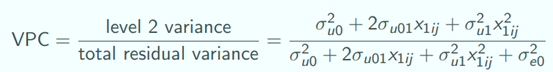

Consider the original random slope model (rs.gen) from earlier in this tutorial.

In [ ]:
summary (rs.gen)

In this case the total Level 2 variance is now 0.06507+0.01126 = 0.07633 (the variance in the intercept plus the variance in the effect of gender).

Total variance is 0.06507+0.01126+0.78037 = 0.8567 (both soures of level 2 variance plus the level 1 variance)

VPC = 0.07633/0.8567 = 0.0891 = 8.9%


### Plotting Residuals ###

In the previous tutorial the "ranef" command was employed to extract the values for each country in terms of their random inetrcept, while combining that command with "dotplot" produced a caterpillar plot of these random effects.

Both of these command generalise to multiple random effects in the case of a random slope model.

In [ ]:
rsgenrand <- ranef(rs.gen)
rsgenrand
dotplot(ranef(rs.gen))

Looking back at the models run earlier in this session, which country is the most hedonistic after controlling for age, education and gender and allowing for the relationships between hedonism and age and gender to differ across countries? Draw an appropriate caterpillar plot to illustrate your answer. 

### Plotting Fixed and Random Effects ###

The syntax for producing caterpillar plots of random effects has been shown above (and in the tutorial on random intercept models).  However, it can also be useful to produce plots of the explanatory relationships uncovered by a model.  

The tutorial on single level models, shows how to plot predicted values to illustrate the coefficients within a model using the standard plotting commands provided within R.  Those comfortable with R may well find that they can expand that syntax to plot the relationships uncovered by random intercept and random slope models.  Several R packages are avalaible which can help simplify these processes - they provide "wrapper commands" which allow users to create complex graphs through single standardised commands.

The "effects" package https://cran.r-project.org/web/packages/effects/ is one example of such a package.  A second package is "sjPlot" https://cran.r-project.org/web/packages/sjPlot/.

Niether of these packages is pre-installed in the Noteable environment.  Therefore, if you wish to use one from within Noteable you will need to use the "install.packages ()" command prior to been able to call teh package with the "library ()" command.

For example, the command below installs the "sjPlot" package.  This may take several minutes to install.

In [ ]:
install.packages ("sjPlot")

Once a package is installed, it needs to be loaded via the "library()" command as was the case with the libraries called at the start of this tutorial.

In [ ]:
library ("sjPlot")

The "plot_model" command is the main command in the "sjPlot" package and can be used to plot both fixed and random effects from models created using the "lme4" package.

The command below shows the basic syntax of the "plot_model" command, it plots the average effect of been female on hendomism, as estimated in the random intercept model, "hedri".

The first argument names the model that contains the relationship to be plotted, in this case "hedri" created earlier. 

"type="pred"" means that we want to plot the relationship as estimated by the model, i.e. the predicted (smoothed) relationship rather than the underlying data points.

The "terms" argument lists the explanatory variables to be included in defining the relationships to be plotted, in this case simply the variable "female".

Finally, "pred.type = c("fe")" tells R that we want to plot the fixed, average, effect for the chosen explanatory variable.

In [ ]:
plot_model (hedri, type="pred", terms = c("female"), pred.type = c("fe")) 

Given "female" is a categorical variable, the above plot could be considered unneccsary (only the x-axis values of 0 and 1 are relevant).  However, it does illustarte the negative relationship suggested by the original model.  The shaded area represents the 95% confidence interval for the plotted relationship.

Recall that model, "hedri" is a random intercept model, hence while the effect of gender on hedonism is held constant across countries, different countries can have different intercepts and hence females/males in different countries will have, on average, different levels of hedonism.  This difference is not shown in the plot above.

The command below illustrates how to plot explanatory relationships from a random intercept, taking into account the different intercept values for the level 2 units (countries).

Once again, the "plot_model" command is used, and the basic setup is as above, passing the name of the model to be used and "type="pred"".  However, this time the "terms" argument includes not only the explanatory variable the plot is meant to include ("female"), but also the variable responsible for the random intercept that should be included ("country").  

Since the plot needs to account for random effects (in this case the random intercept), the "pred.type" argument is updated to read "re", telling R to include the random, as well as fixed, effects in the predicted values used to create the plot. 

Finally, the argument colors = "gs" is added to teh command.  This produces a grayscale plot. When graphing arndom effects, the plot will include a seperate line for each country (or more generally, each level 2 unit).  However, the majority of colour palettes avalaible in R contain only a handful of colours.  In the event that a model contains more level 2 units than there are colours in the colour palette chosen, only the first x number of units (equal to the number of colours in the colour palette) will be plotted.  Asking for a grey-scale graph will see R create a different tone of grey for each level 2 unit that needs to be plotted.  

This is generally acceptable, if the plot is to be used to illustrate a general pattern within the model, but it can be difficult to identify specific level 2 units, since teh different shades of grey can appear very similar.  Those interested in using colour palettes with a larger number of colours may wish to investigate the "colorRampPalette" command https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/colorRamp.html and associated "RColorBrewer" package https://cran.r-project.org/web/packages/RColorBrewer/index.html

NB. Confidence intervals are no longer displayed by default since they would likely overlap and lead to a messy, overly complex, graph.

In [ ]:
plot_model (hedri, type="pred", terms = c("female", "country"), pred.type = c("re"), colors = "gs") 

Plotting a relationship from a random slope model requires indentical syntax to that used to create the fixed effect/random intercept model produced above.  The only difference is that the model passed to the "plot_model" command needs to be a random slope model.  For example, the command below plots the relationship between age (centered) and hedonism as estimated in the model "rs.age2", while taking account of both the relevant random intercepts and any variation in the imapct of age between countries.

Once again, the use of a grey-scale colour scheme can amke it difficult to pick out indivdual countries.  However, unless a country exhibits a truely unique relationship, the interpretation of such garphs is typically concerned with the overall shape of the graph (i.e. do the random slopes group togetehr, or fan out, as discussed in the lecture?).

In [ ]:
plot_model (rs.age2, type="pred", terms = c("agesmallcen", "country"), pred.type = c("re"), colors = "gs") 

If time allows you might wish to try plotting some of the other relationships in the different models estimated earlier.